In [536]:
#import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [537]:
#Load the datasets

df_info = pd.read_csv('superheroes_info.csv')
df_stats = pd.read_csv('superheroes_stats.csv')


In [538]:
#Merge both datasets

df = pd.merge(df_info, df_stats, on='Name')

In [539]:
#Drop column Unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace=True)

In [540]:
#drop duplicate Name
df.drop_duplicates(subset='Name', keep='first', inplace=True)

In [541]:
#filter out df for the Avengers
df_filtered= df[df['Name'].isin(['Captain America', 'Thor','Hulk', 'Black Widow', 'Iron Man', 'Loki', 'Spider-Man', 'Captain Marvel','Doctor Strange', 'Ant-Man'])]



In [542]:
#transpose columns with 18:24 named as Power 
power_df = df_filtered.iloc[:,17:23].transpose()

power_df.columns = df_filtered['Name'].sort_index().values


In [543]:
power_df

,Spider-Man,Captain America,Iron Man,Thor,Hulk,Black Widow,Loki,Ant-Man,Captain Marvel,Doctor Strange
Intelligence,88.0,63.0,100.0,69.0,88.0,75.0,88.0,100.0,100.0,100.0
Strength,55.0,19.0,85.0,100.0,100.0,13.0,57.0,10.0,100.0,10.0
Speed,60.0,35.0,58.0,92.0,47.0,27.0,47.0,23.0,67.0,12.0
Durability,74.0,56.0,85.0,100.0,100.0,32.0,85.0,28.0,95.0,84.0
Power,58.0,46.0,100.0,100.0,41.0,32.0,85.0,32.0,62.0,100.0
Combat,85.0,100.0,64.0,85.0,85.0,100.0,56.0,32.0,56.0,60.0


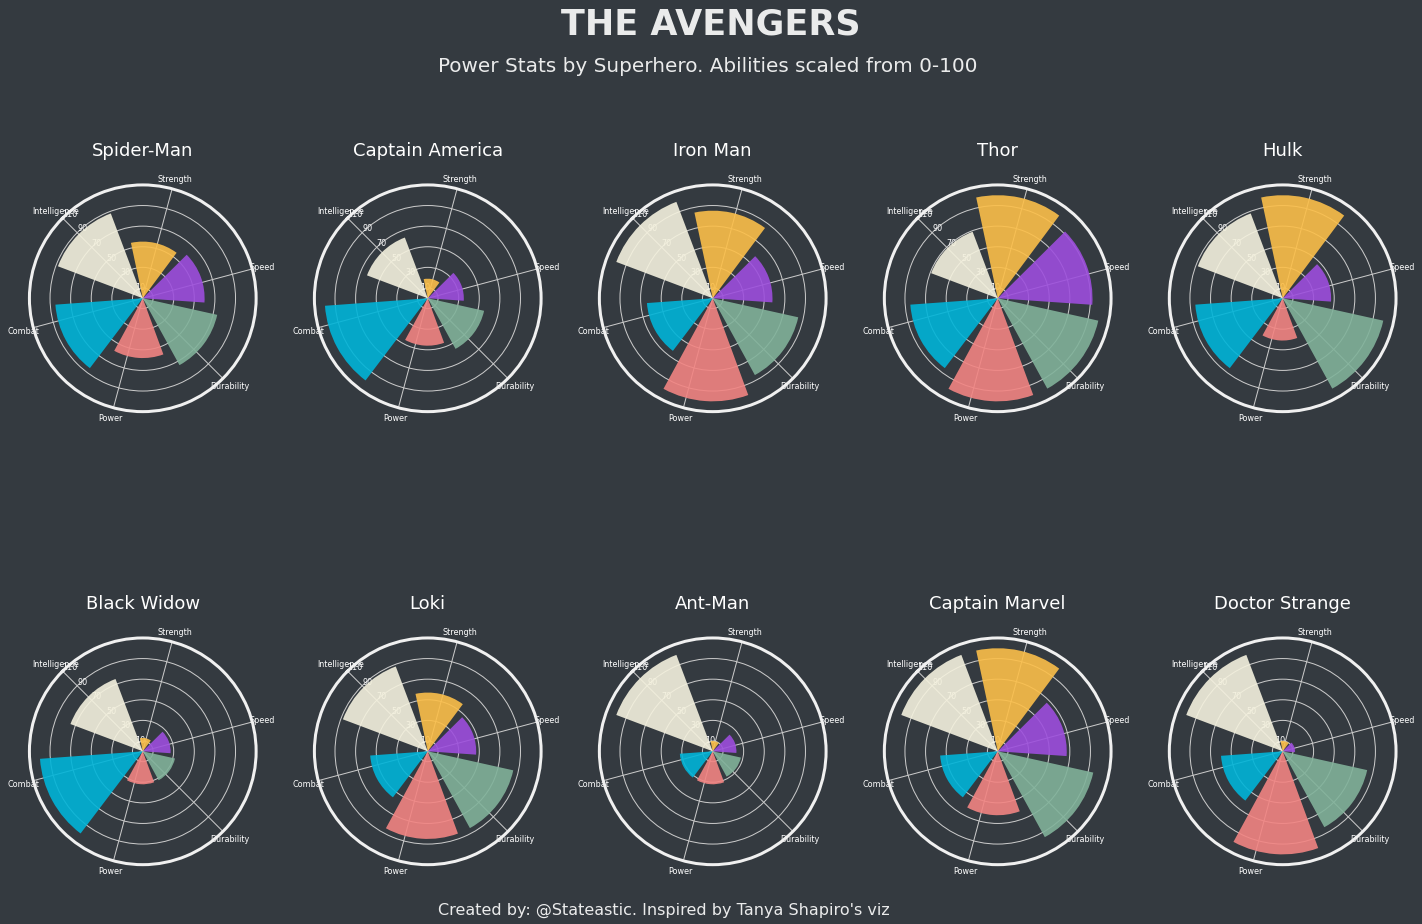

In [544]:
#set the figure size
fig = plt.figure(figsize=(20,18))

#Create a Grid of 2 Rows and 5 Columns
gs = gridspec.GridSpec(2,5, width_ratios=[1,1,1,1,1])

#set the fig colour
fig.patch.set_facecolor('#343a40')

#create a polar bar chart as per gridspec
for i in range(0,10):
    ax = plt.subplot(gs[i], polar=True, zorder = 1, facecolor='#343a40', alpha = 0.2)
    ax.set_title(df_filtered['Name'].iloc[i], fontsize=18, color='white', pad=30)
    ax.set_facecolor('#343a40')
    ax.bar(x = power_df.index, height = power_df[df_filtered['Name'].iloc[i]], width=0.85, color=['#f4f1de', '#fcbf49', '#9d4edd', '#81b29a', '#f28482', '#00b4d8'], alpha =0.9, zorder = 1)
    ax.set_xticks(np.arange(0,2*np.pi, 2*np.pi/6))
    ax.set_xticklabels(power_df.index, fontsize=8, fontname='Trebushet MS', color='white', zorder = 2)
    ax.set_yticks(np.arange(10,120,20))
    ax.set_yticklabels(np.arange(10,120,20), fontsize=8, fontname= 'Trebushet MS', color='white', zorder = 2)
    ax.set_rlabel_position(0)
    ax.set_theta_zero_location('NW')
    ax.set_theta_direction(-1)

#reduce the space between the subplot
plt.subplots_adjust(wspace=.6, hspace=-0.25)

#fit the plot to the figure
fig.tight_layout()

plt.suptitle('THE AVENGERS', fontsize=35, color='white', y=.90, x=0.5, fontname='Trebushet MS', weight='bold', alpha=0.9, zorder = 3)

plt.figtext(0.31, 0.85, 'Power Stats by Superhero. Abilities scaled from 0-100', fontsize=20, color='white', fontname='Trebushet MS', alpha=0.9, zorder = 3)

plt.figtext(0.31, 0.2, "Created by: @Stateastic. Inspired by Tanya Shapiro's viz", fontsize=16, color='white', fontname='Trebushet MS', alpha=0.9, zorder = 3)

plt.savefig('Avengers_comparison.png', dpi=300, facecolor='#343a40')
